**Client :**  Sales Effectiveness   
**Category :** Product Sales  
**Project Ref :** PM-PR-0019  
**PROJECT TEAM ID:** PTID-CDS-JAN-24-1768


# Business Case

FicZon Inc is an IT solution provider with products ranging from on-premises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website.  

FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.  

Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff.Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.  

FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.  

# Domain Analysis

**Created:**

* This is unique feature in data tell about activity related to the selling and no of goods sold in certain date as well as time.

**Product ID:**

* Id of particular product.

**Source:**

* The source is contain imformation about the customer systematic search like call, live chats, and campaign.

**Mobile:**

* This is a unique feature contain a Mobile number of customer.

**Email:**

* This also unique feature contain a Email-id of customer.

**Sales Agent:**

* Sales agent is a front line customer service, A person or a company that acts as a sales agent on behalf of the exporting company ( principal ), introducing its products to potential buyers in the external market, in exchange for a commission based on the value of the business deals arranged and paid to the principal.

**Location:**

* The Location of sale field always has the main business address in it and has to be changed manually. This also means that the sales tax is computed based on the main business address and not the actual location of the sale.

* This feature contain lots of different location.

**Delivery mode:**

* Modes of Delivery of goods may be made in any of the following three ways:

1) Actual Delivery: Also known as physical delivery, actual delivery takes place when the goods are physically handed over by the seller or his/her authorized agent to the buyer or his/her agent authorized to take possession of the goods.

2) Symbolic Delivery: Where the goods are bulky and heavy and it is not possible to physically hand them over to the buyer, delivery thereof may be made by indicating or giving a symbol. Here the goods itself are not delivered, but the means of obtaining possession of goods is delivered.

3) Constructive Delivery: In this case neither physical nor symbolic delivery is made. In constructive delivery the individual possessing the products recognizes that he holds the merchandise for the benefit of, and at the disposal of the purchaser. Constructive delivery is also called attornment.

**Status:**

* This is a target variable tell about the lead category of customer.[high potential, low potential]

In [1]:
!pip install pymysql

   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   ------------------ --------------------- 20.5/45.0 kB 320.0 kB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 551.3 kB/s eta 0:00:00


In [5]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###### Import the data from SQL database

In [7]:
database = pymysql.connect(user='dm_team2',
                          passwd='DM!$Team&27@9!20!',
                          host='18.136.157.135',
                          database='project_sales')

In [9]:
table = database.cursor()
table.execute('show tables')
table.fetchall()          

(('data',),)

In [11]:
query = 'select * from data'
table.execute(query)

7422

In [13]:
df = pd.read_sql_query(query,database)

In [14]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [21]:
df.Source.unique()

array(['Website', '', 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

### Basic Checks

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [14]:
df.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [15]:
df.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [16]:
df.replace('',np.nan,inplace=True)

In [17]:
df.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7364 non-null   object
 2   Source         7405 non-null   object
 3   Mobile         5612 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7399 non-null   object
 6   Location       7364 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


### Handling with Created 

In [19]:
df['Created'] = df['Created'].astype('datetime64[ns]')

In [20]:
df.Created

0      2018-11-14 10:05:00
1      2018-11-14 09:22:00
2      2018-11-14 09:21:00
3      2018-11-14 08:46:00
4      2018-11-14 07:34:00
               ...        
7417   2018-04-28 09:45:00
7418   2018-04-28 09:43:00
7419   2018-04-28 09:20:00
7420   2018-04-28 08:04:00
7421   2018-04-28 07:54:00
Name: Created, Length: 7422, dtype: datetime64[ns]

In [21]:
df['Created_month'] = df['Created'].dt.month
df['Created_day'] = df['Created'].dt.day

In [22]:
df.Created_month.value_counts()

6     1045
5     1041
7      960
9      922
8      914
10     831
4      370
11     350
2      295
3      255
1      226
12     213
Name: Created_month, dtype: int64

In [23]:
df.drop('Created',axis=1,inplace=True)

### Created Lead Category Columns

*Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff.Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.*

In [24]:
df.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [25]:
status = ['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted']

In [26]:
lead_category_HP = ['Open', 'Potential', 'In Progress Positive','CONVERTED','converted']
lead_category_LP = [ 'Not Responding','Just Enquiry', 'Junk Lead',  'In Progress Negative','LOST', 
                    'Long Term' ]

In [27]:
for i in lead_category_HP:
    c = i
    df.loc[df.Status == c,'Status'] = 'HP'

In [28]:
for i in lead_category_LP:
    c = i
    df.loc[df.Status == c,'Status'] = 'LP'

In [29]:
df.Status.unique()

array(['HP', 'LP'], dtype=object)

In [30]:
df.head()

,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Created_month,Created_day
0,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,HP,11,14
1,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,HP,11,14
2,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,HP,11,14
3,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,HP,11,14
4,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,HP,11,14


# EDA

## Univariate Analysis 

In [31]:
import sweetviz as sv

                                             |                                             | [  0%]   00:00 ->…


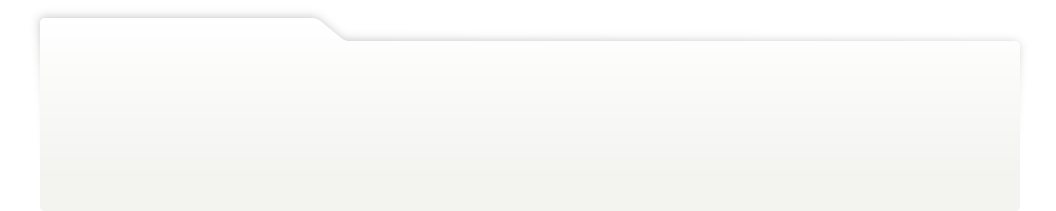
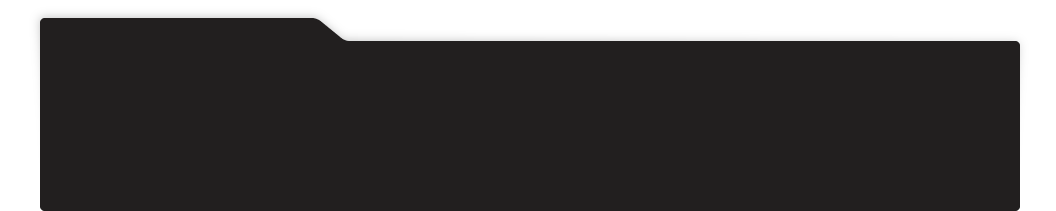
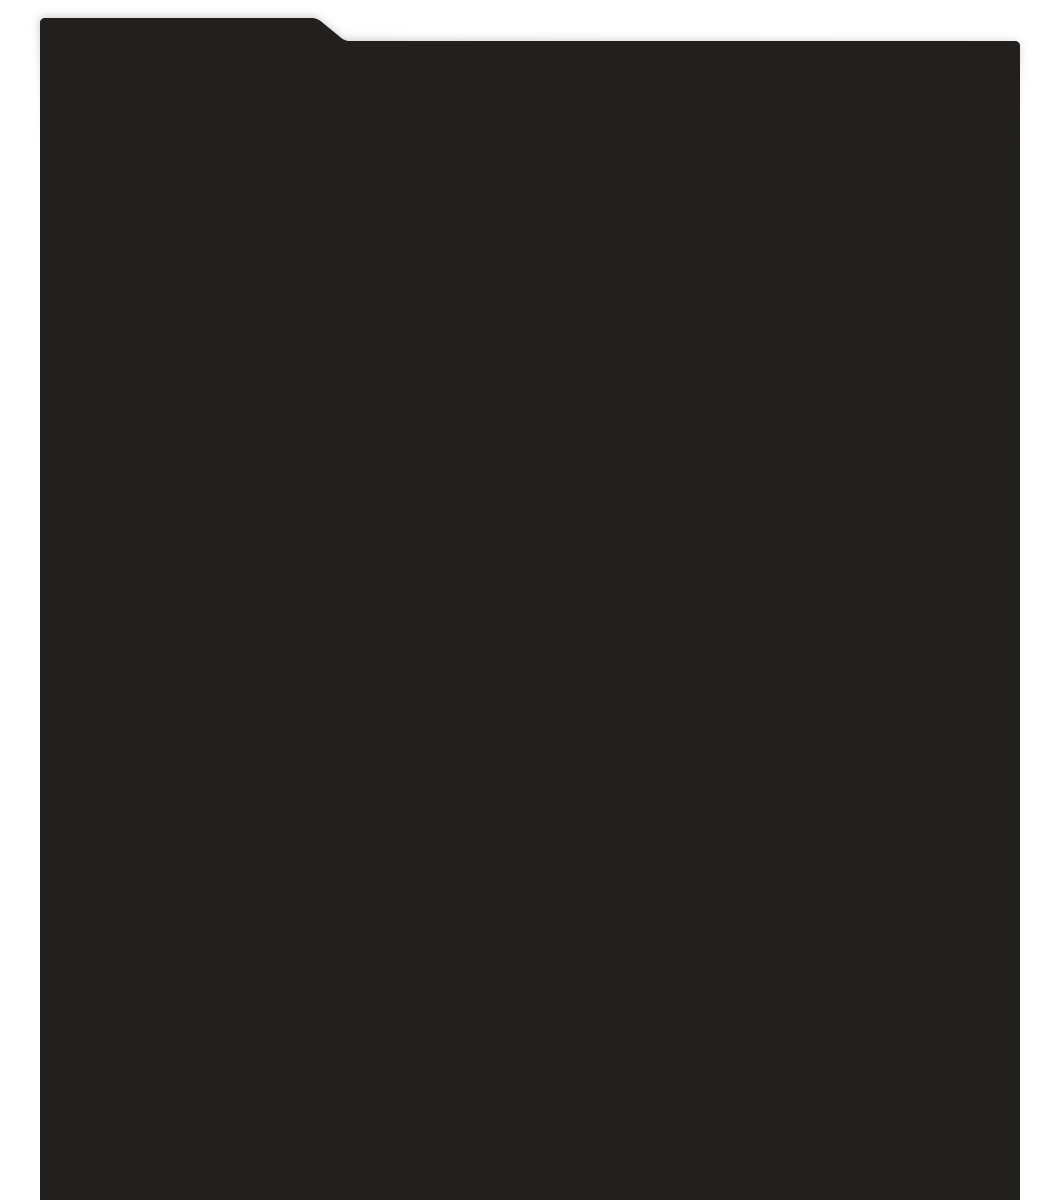
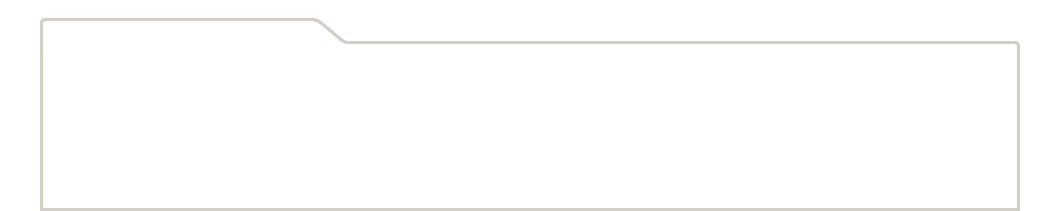
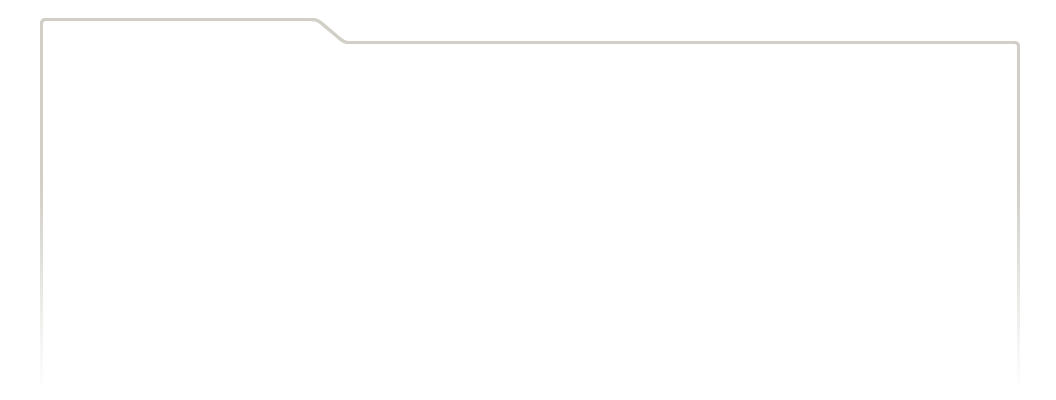
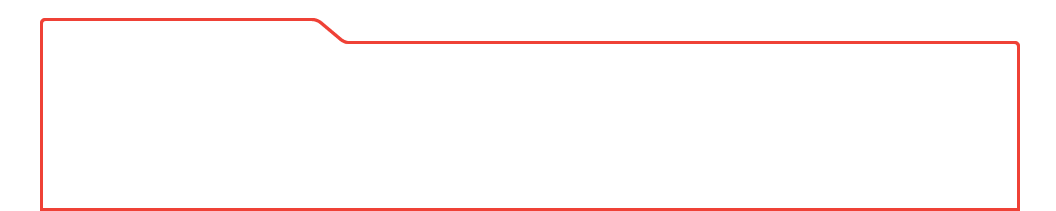
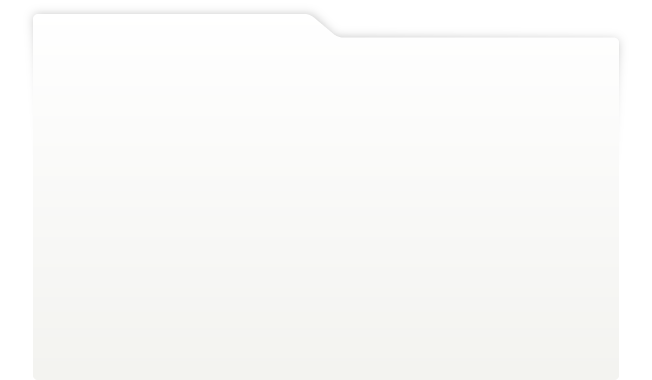
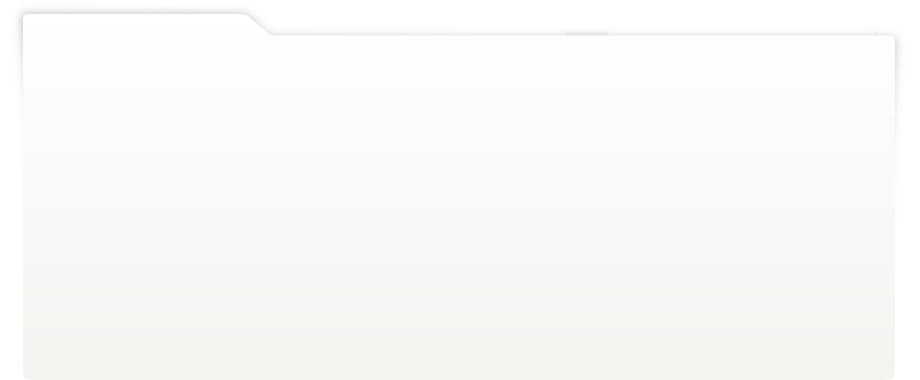
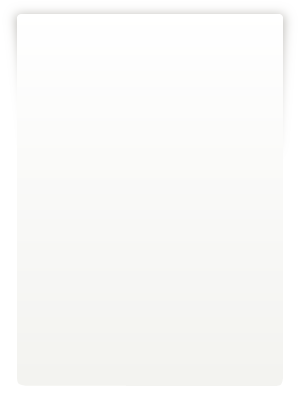
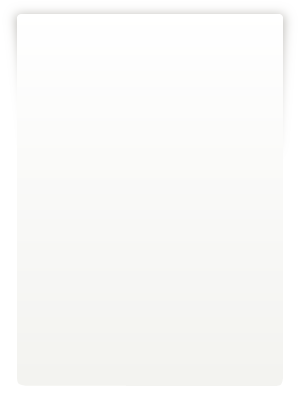
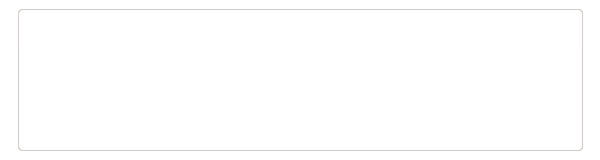
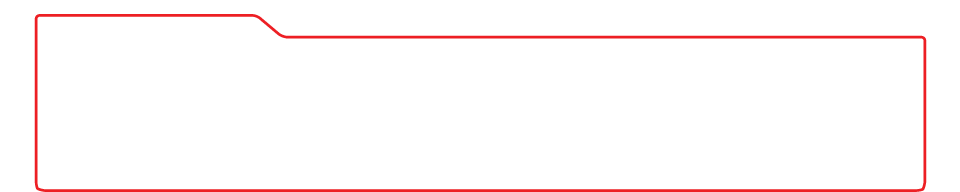
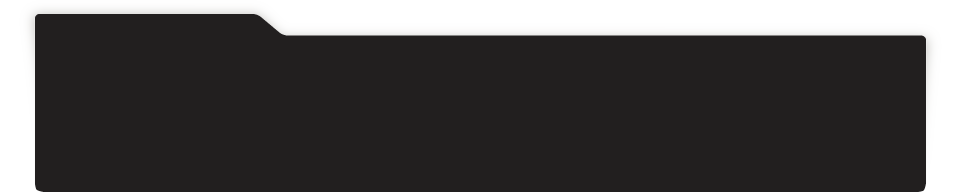
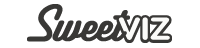
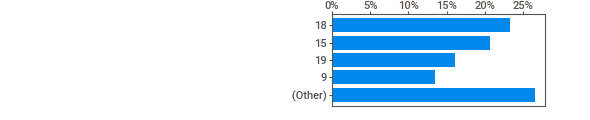
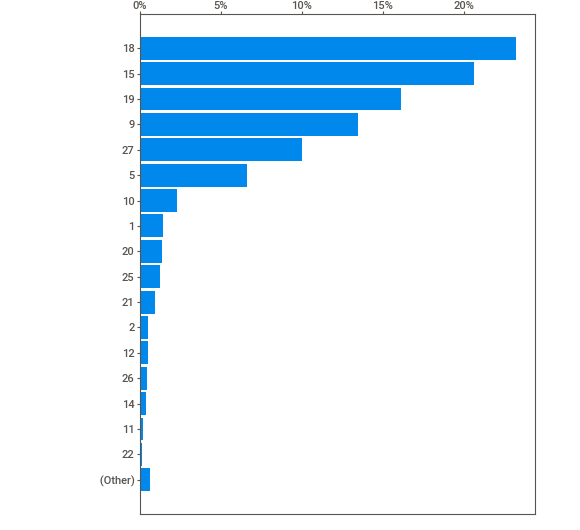
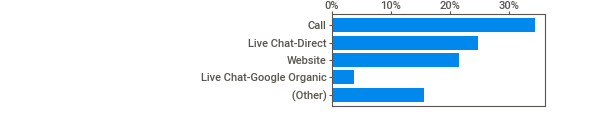
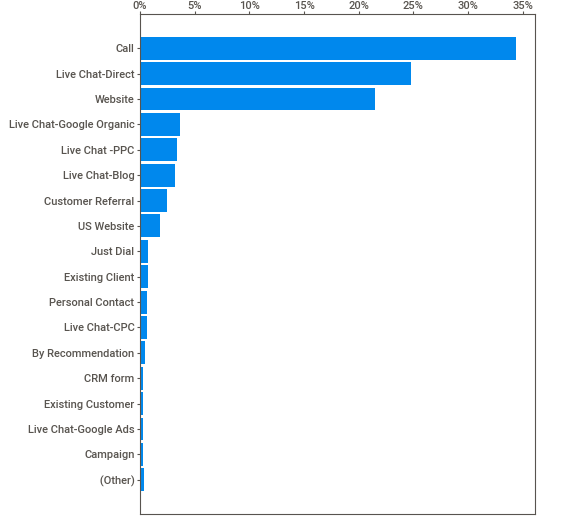
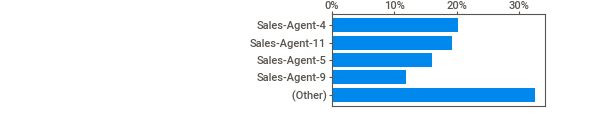
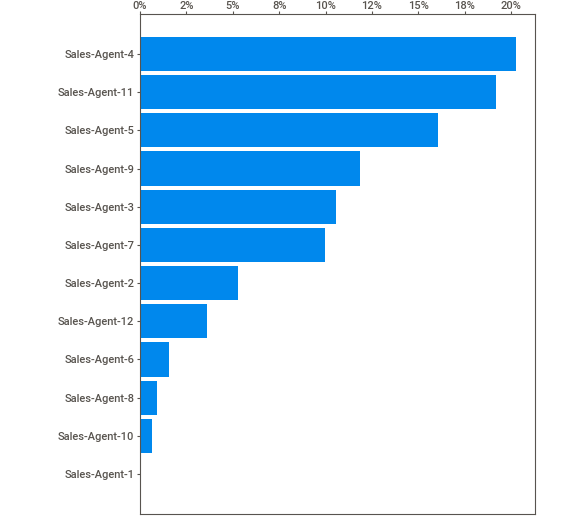
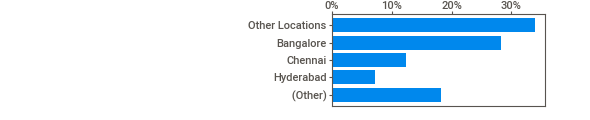
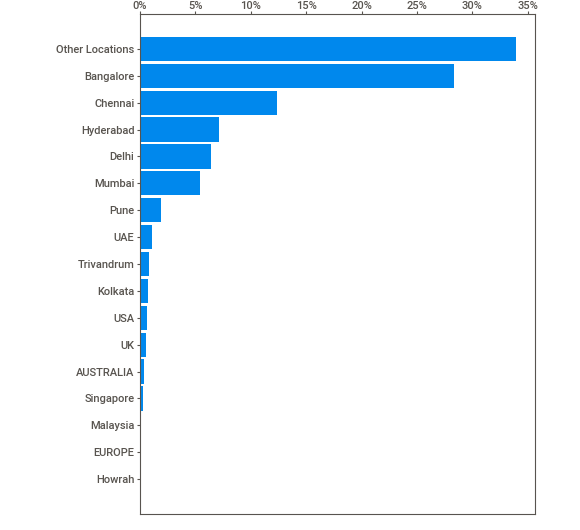
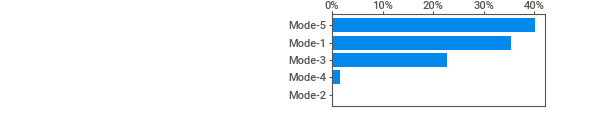
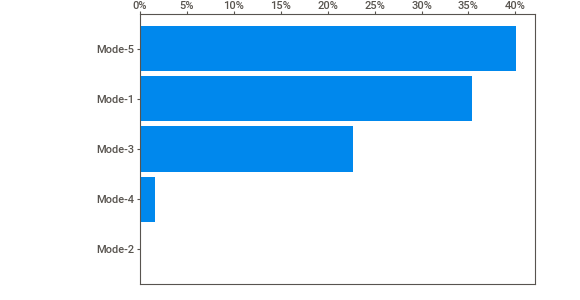
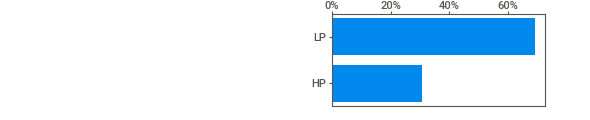
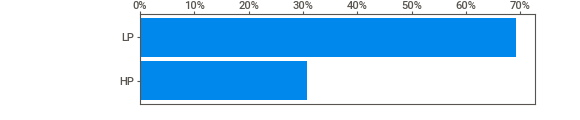
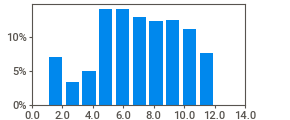
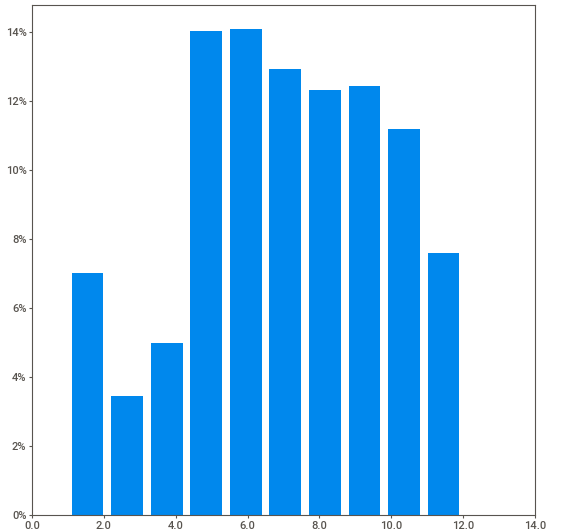
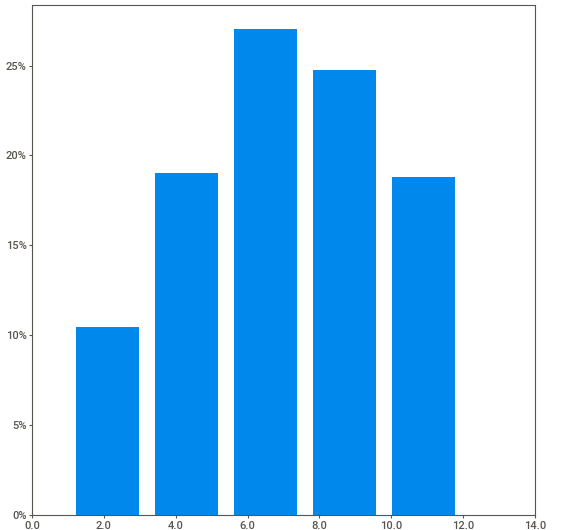
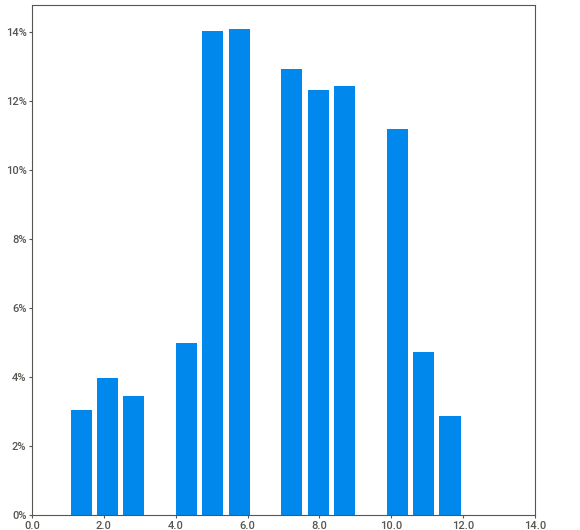
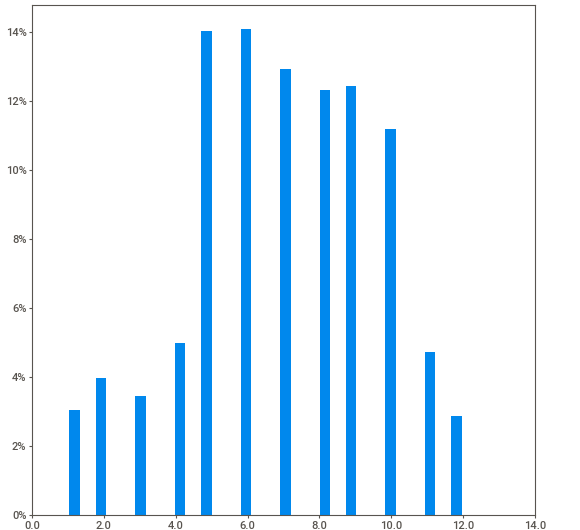
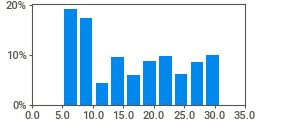
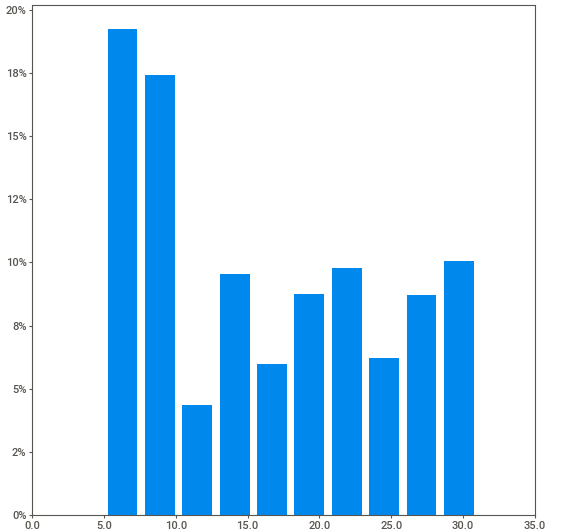
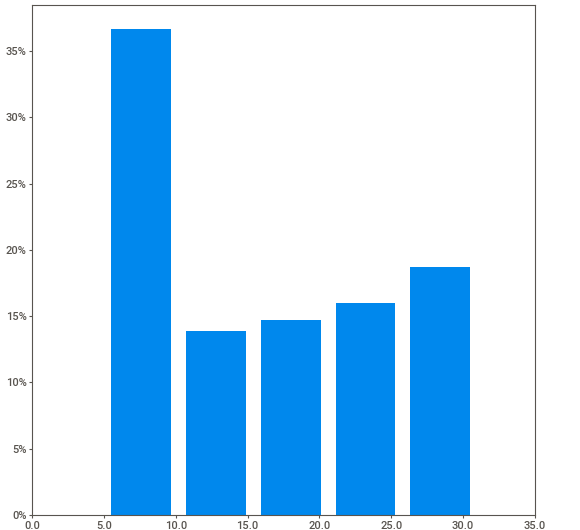
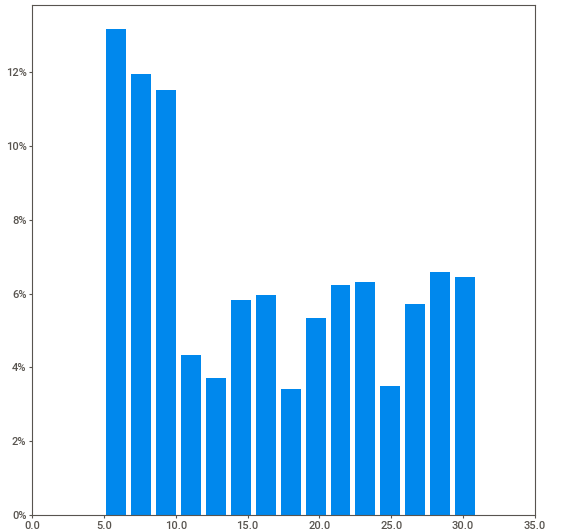
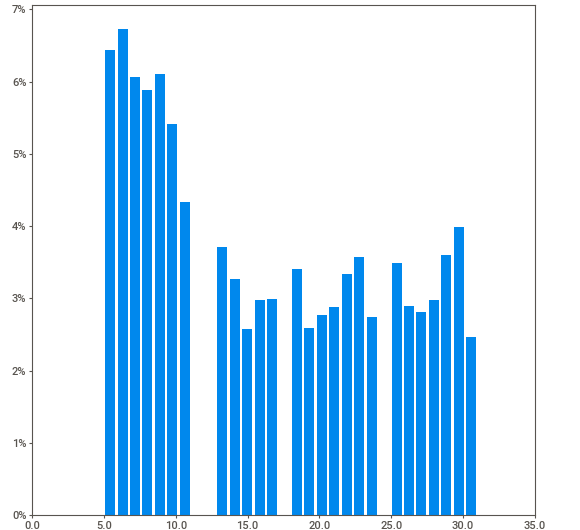
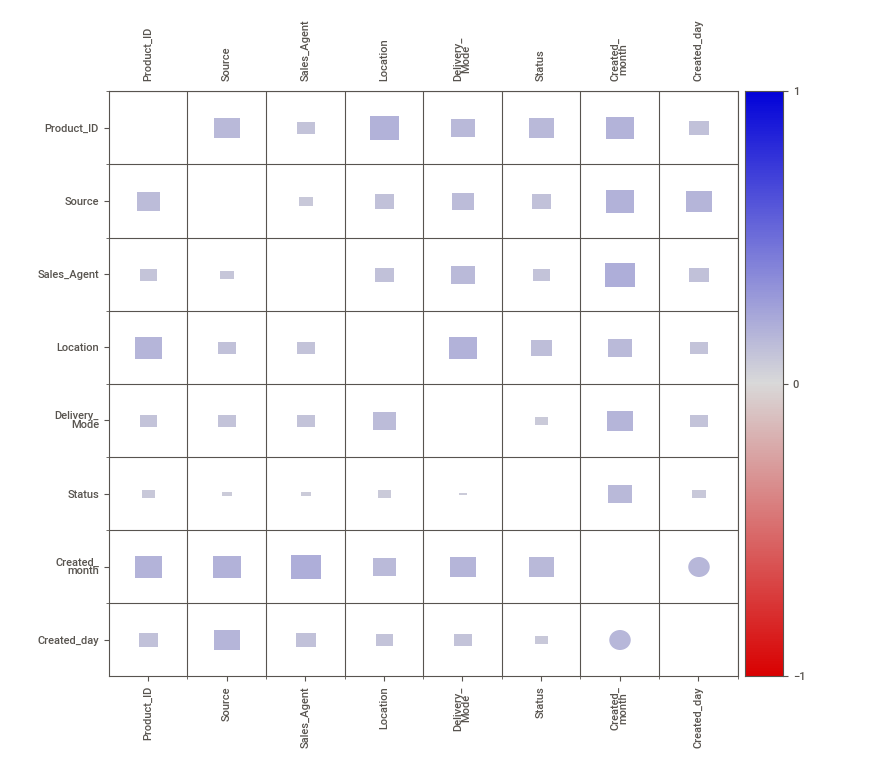
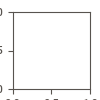

In [32]:
my_report = sv.analyze(df)
my_report.show_notebook()

## Bivariate Analysis

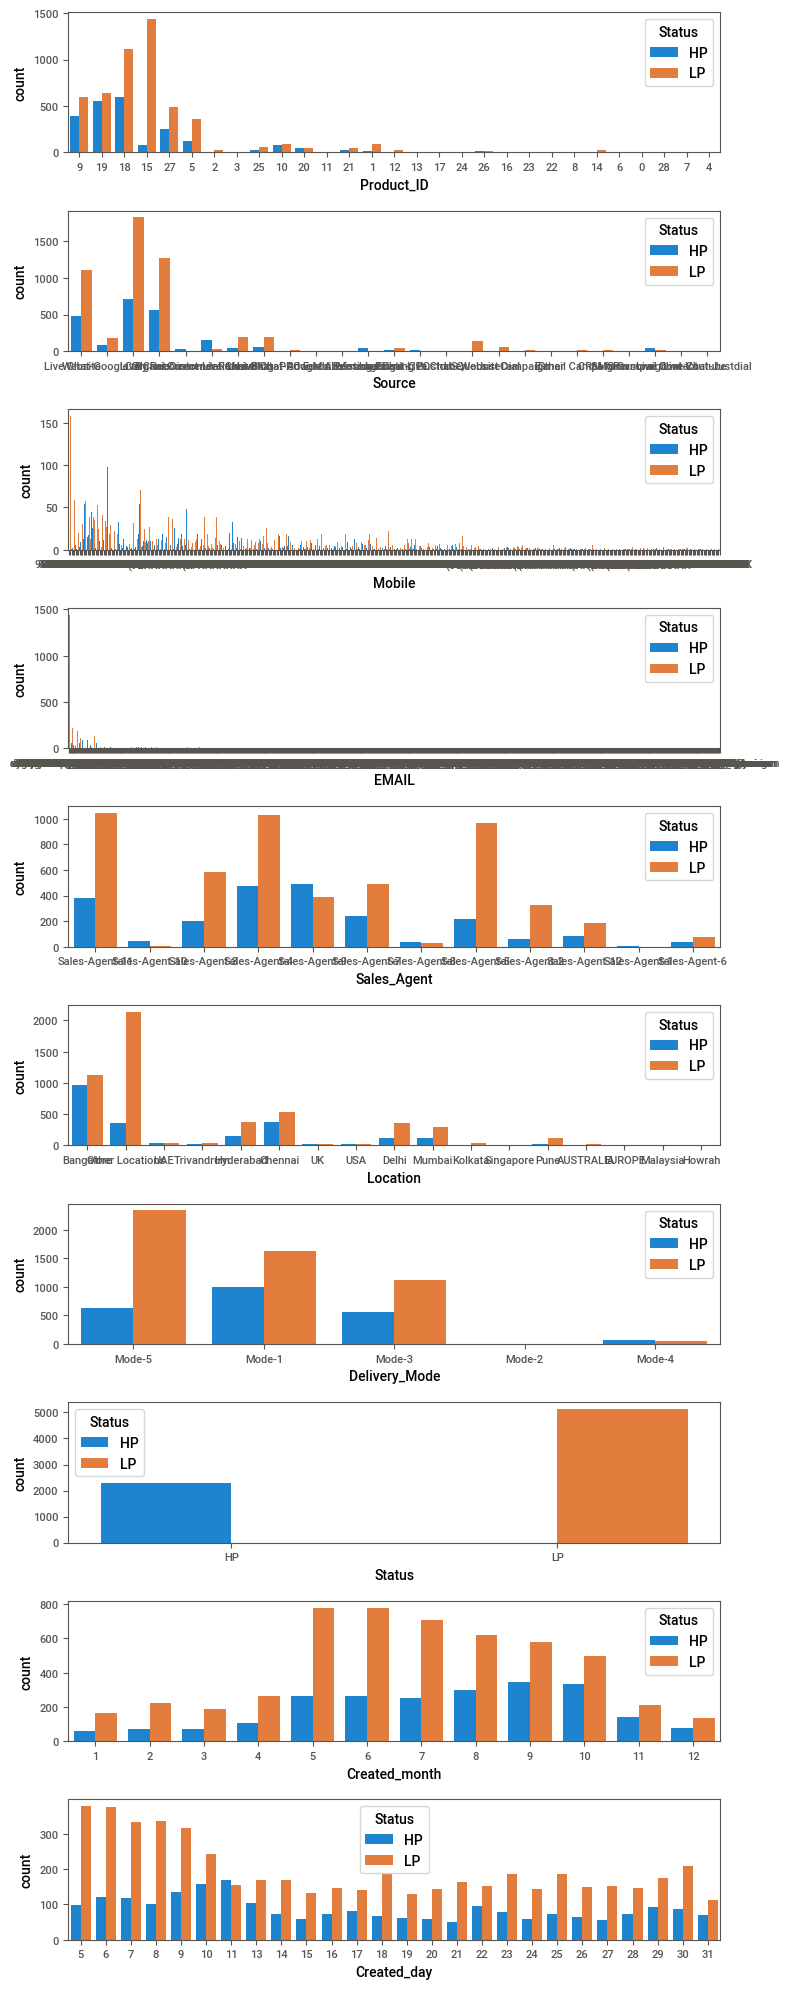

In [33]:
plotnumber = 1
plt.figure(figsize=(8,20))
for i in df:
    plt.subplot(10,1,plotnumber)
    sns.countplot(x = df[i],hue=df.Status)
    plotnumber=plotnumber+1
plt.tight_layout()

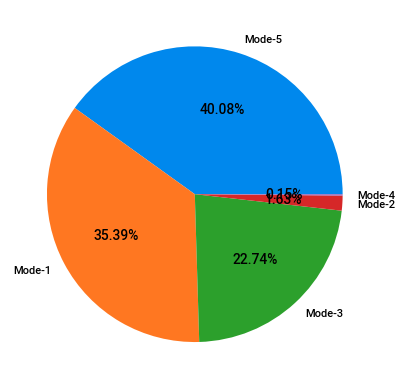

In [34]:
plt.pie(df.Delivery_Mode.value_counts(),labels=df.Delivery_Mode.unique(),autopct='%.2f%%')
plt.show()

### Insights:

#### 1.Source:

* Most of the sales has call, live chat direct and website source.
     
* Remaining all the other sources are less than 250.

#### 2.Sales_Agent:

* Most of the sales are done by sales agent 4, sales agent 11 and sales agent 5.

* Sales agent 3,9,7 has below than 850 sale.

* Remaining all other sales agent has done less sale.

#### 3.Location:

* Banglore and other location has more sales.

* Chennai, Hyderabad, Delhi and Mumbai city has sales less than that of Bangalore and other location.

* Remaining other cities has extremly less sale.

#### 4.Delivery Mode:

* Delivery Mode 5 has maximum count.

* Mode 1 & Mode 3 has less count than mode 5.

* Mode 2 & 4 has minimum count for delivery.

#### 5.Status:

* The junk lead means low potential customer or client has high count in comparison to others..

* Low potential customers are more and high potential customers are less.

# Data Preproessing

## Handling Null values

In [35]:
df.isnull().sum()

Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
Created_month       0
Created_day         0
dtype: int64

In [36]:
df.Product_ID.value_counts()

18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [37]:
df.loc[df.Product_ID.isnull(),'Product_ID'] = 18

In [38]:
df.Mobile.value_counts()

XXXXXXX       222
988XXXXXXX    211
984XXXXXXX    177
998XXXXXXX    125
994XXXXXXX    112
             ... 
747XXXXXXX      1
124XXXXXXX      1
031XXXXXXX      1
(31XXXXXXX      1
9535207621      1
Name: Mobile, Length: 486, dtype: int64

In [39]:
df.loc[df.Mobile.isnull(),'Mobile'] = 'XXXXXXX'

In [40]:
df.Source.value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source, dtype: int64

In [41]:
df.loc[df.Source.isnull(),'Source'] = 'Call'

In [42]:
df.Sales_Agent.value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [43]:
df.loc[df.Sales_Agent.isnull(),'Sales_Agent'] = 'Sales-Agent-4'

In [44]:
df.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [45]:
df.loc[df.Location.isnull(),'Location'] = 'Other Locations'

In [46]:
df.isnull().sum()

Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
Created_month    0
Created_day      0
dtype: int64

## Conversion of Categorical data  to Numerical data

In [47]:
df.Product_ID.astype('int64')

0       18
1       18
2       18
3       18
4       18
        ..
7417     9
7418    15
7419     5
7420    21
7421    25
Name: Product_ID, Length: 7422, dtype: int64

In [48]:
df['Product_ID'] = df.Product_ID.astype('int64')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     7422 non-null   int64 
 1   Source         7422 non-null   object
 2   Mobile         7422 non-null   object
 3   EMAIL          7422 non-null   object
 4   Sales_Agent    7422 non-null   object
 5   Location       7422 non-null   object
 6   Delivery_Mode  7422 non-null   object
 7   Status         7422 non-null   object
 8   Created_month  7422 non-null   int64 
 9   Created_day    7422 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 580.0+ KB


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
for i in df.drop(['Product_ID'],axis=1):
    df[i] = le.fit_transform(df[i])

In [52]:
df

,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Created_month,Created_day
0,18,24,463,149,2,10,4,0,10,8
1,18,24,482,0,1,10,4,0,10,8
2,18,24,482,283,1,10,4,0,10,8
3,18,24,482,867,1,10,4,0,10,8
4,18,24,482,245,1,10,4,0,10,8
...,...,...,...,...,...,...,...,...,...,...
7417,9,2,482,149,8,9,3,1,3,22
7418,15,2,482,0,3,10,4,1,3,22
7419,5,14,482,738,2,1,0,1,3,22
7420,21,1,482,136,6,10,0,1,3,22


## Model Creation

In [53]:
x = df.drop('Status',axis=1)
y = df.Status

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, random_state=42,test_size=0.2)

In [55]:
y_train.value_counts()

1    4134
0    1803
Name: Status, dtype: int64

## Balacing 

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
sm = SMOTE()

In [58]:
x_sm, y_sm = sm.fit_resample(x_train,y_train)

In [59]:
y_train.value_counts()

1    4134
0    1803
Name: Status, dtype: int64

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score

### Logistic Regression

In [61]:
lr = LogisticRegression()

In [62]:
lr.fit(x_sm,y_sm)

LogisticRegression()

In [63]:
y_pred = lr.predict(x_test)

In [64]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_pred),'\n')
print('classification_report\n',
      classification_report(y_test,y_pred))

Test Score

accuracy_score 0.663973063973064 

classification_report
               precision    recall  f1-score   support

           0       0.49      0.64      0.55       482
           1       0.80      0.68      0.73      1003

    accuracy                           0.66      1485
   macro avg       0.64      0.66      0.64      1485
weighted avg       0.69      0.66      0.67      1485



In [65]:
y_predit_lr_train = lr.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_lr_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_lr_train))

Train Score

accuracy_score 0.6390432878558194 

classification_report
               precision    recall  f1-score   support

           0       0.44      0.64      0.52      1803
           1       0.80      0.64      0.71      4134

    accuracy                           0.64      5937
   macro avg       0.62      0.64      0.62      5937
weighted avg       0.69      0.64      0.65      5937



### SVM

In [66]:
svm = SVC()

In [67]:
svm.fit(x_sm,y_sm)

SVC()

In [68]:
y_predit_svm = svm.predict(x_test)

In [69]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_svm),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_svm))

Test Score

accuracy_score 0.534006734006734 

classification_report
               precision    recall  f1-score   support

           0       0.39      0.79      0.52       482
           1       0.80      0.41      0.54      1003

    accuracy                           0.53      1485
   macro avg       0.60      0.60      0.53      1485
weighted avg       0.67      0.53      0.54      1485



In [70]:
y_predit_svm_train = svm.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_svm_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_svm_train))

Train Score

accuracy_score 0.5088428499242041 

classification_report
               precision    recall  f1-score   support

           0       0.36      0.80      0.50      1803
           1       0.81      0.38      0.52      4134

    accuracy                           0.51      5937
   macro avg       0.59      0.59      0.51      5937
weighted avg       0.68      0.51      0.51      5937



### KNN

In [71]:
knn = KNeighborsClassifier(n_neighbors=5)

In [72]:
knn.fit(x_sm,y_sm)

KNeighborsClassifier()

In [73]:
y_predit_knn = knn.predict(x_test)

In [74]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_knn),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_knn))

Test Score

accuracy_score 0.6242424242424243 

classification_report
               precision    recall  f1-score   support

           0       0.44      0.60      0.51       482
           1       0.77      0.64      0.70      1003

    accuracy                           0.62      1485
   macro avg       0.60      0.62      0.60      1485
weighted avg       0.66      0.62      0.63      1485



In [75]:
y_predit_knn_train = knn.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_knn_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_knn_train))

Train Score

accuracy_score 0.7574532592218292 

classification_report
               precision    recall  f1-score   support

           0       0.57      0.85      0.68      1803
           1       0.92      0.72      0.80      4134

    accuracy                           0.76      5937
   macro avg       0.74      0.78      0.74      5937
weighted avg       0.81      0.76      0.77      5937



## Decision Tree 

In [76]:
dt = DecisionTreeClassifier()

In [77]:
dt.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [78]:
y_predit_dt = dt.predict(x_test)

In [79]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_dt),'\n')
print('classification_report\n',classification_report(y_test,y_predit_dt))

Test Score

accuracy_score 0.663973063973064 

classification_report
               precision    recall  f1-score   support

           0       0.48      0.52      0.50       482
           1       0.76      0.73      0.75      1003

    accuracy                           0.66      1485
   macro avg       0.62      0.63      0.62      1485
weighted avg       0.67      0.66      0.67      1485



In [80]:
y_predit_dt_train = dt.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_dt_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_dt_train))

Train Score

accuracy_score 0.999326259053394 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1803
           1       1.00      1.00      1.00      4134

    accuracy                           1.00      5937
   macro avg       1.00      1.00      1.00      5937
weighted avg       1.00      1.00      1.00      5937



## Bagging using Decision Tree

In [81]:
model_bagg = BaggingClassifier(base_estimator=dt, n_estimators=30,random_state=15)

model_bagg.fit(x_sm,y_sm)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=30,
                  random_state=15)

In [82]:
y_predit_bagg = model_bagg.predict(x_test)

In [83]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_bagg),'\n')
print('classification_report\n',classification_report(y_test,y_predit_bagg))

Test Score

accuracy_score 0.7016835016835017 

classification_report
               precision    recall  f1-score   support

           0       0.54      0.51      0.53       482
           1       0.77      0.79      0.78      1003

    accuracy                           0.70      1485
   macro avg       0.66      0.65      0.66      1485
weighted avg       0.70      0.70      0.70      1485



In [84]:
y_predit_bagg_train = dt.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_bagg_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_bagg_train))

Train Score

accuracy_score 0.999326259053394 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1803
           1       1.00      1.00      1.00      4134

    accuracy                           1.00      5937
   macro avg       1.00      1.00      1.00      5937
weighted avg       1.00      1.00      1.00      5937



## Random Forest 

In [85]:
rf = RandomForestClassifier()

In [86]:
rf.fit(x_sm,y_sm)

RandomForestClassifier()

In [87]:
y_predit_rf = rf.predict(x_test)

In [88]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_rf))

Test Score

accuracy_score 0.7286195286195286 

classification_report
               precision    recall  f1-score   support

           0       0.59      0.53      0.56       482
           1       0.79      0.82      0.80      1003

    accuracy                           0.73      1485
   macro avg       0.69      0.68      0.68      1485
weighted avg       0.72      0.73      0.72      1485



In [89]:
y_predit_rf_train = rf.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_rf_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_rf_train))

Train Score

accuracy_score 0.999326259053394 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1803
           1       1.00      1.00      1.00      4134

    accuracy                           1.00      5937
   macro avg       1.00      1.00      1.00      5937
weighted avg       1.00      1.00      1.00      5937



## Hyperparameter Tuning using Random Forest

In [90]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [91]:
grid_search = RandomizedSearchCV(rf, random_grid, cv=5, scoring='accuracy',random_state=23)


In [92]:
grid_search.fit(x_sm,y_sm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=23, scoring='accuracy')

In [93]:
grid_search.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [94]:
rf_hyp = RandomForestClassifier( n_estimators = 1200,
  min_samples_split = 2,
  min_samples_leaf = 2,
  max_features =  'sqrt' ,
  max_depth = 20,
  bootstrap = False)

In [95]:
rf_hyp.fit(x_sm,y_sm)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       n_estimators=1200)

In [96]:
y_predit_rf_hyp = rf_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_rf_hyp))

Test Score

accuracy_score 0.7272727272727273 

classification_report
               precision    recall  f1-score   support

           0       0.59      0.51      0.55       482
           1       0.78      0.83      0.80      1003

    accuracy                           0.73      1485
   macro avg       0.69      0.67      0.68      1485
weighted avg       0.72      0.73      0.72      1485



In [97]:
rf_hyp_train = rf_hyp.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,rf_hyp_train),'\n')
print('classification_report\n',classification_report(y_train,rf_hyp_train))

Train Score

accuracy_score 0.9969681657402729 

classification_report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1803
           1       1.00      1.00      1.00      4134

    accuracy                           1.00      5937
   macro avg       1.00      1.00      1.00      5937
weighted avg       1.00      1.00      1.00      5937



## Gradient Boosting

In [98]:
gb = GradientBoostingClassifier()

In [99]:
gb.fit(x_sm,y_sm)

GradientBoostingClassifier()

In [100]:
y_predit_gb = gb.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_gb),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_gb))

Test Score

accuracy_score 0.7326599326599327 

classification_report
               precision    recall  f1-score   support

           0       0.59      0.58      0.59       482
           1       0.80      0.81      0.80      1003

    accuracy                           0.73      1485
   macro avg       0.69      0.69      0.69      1485
weighted avg       0.73      0.73      0.73      1485



In [101]:
y_predit_gb_train = gb.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_gb_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_gb_train))

Train Score

accuracy_score 0.7512211554657234 

classification_report
               precision    recall  f1-score   support

           0       0.58      0.65      0.61      1803
           1       0.84      0.79      0.82      4134

    accuracy                           0.75      5937
   macro avg       0.71      0.72      0.72      5937
weighted avg       0.76      0.75      0.75      5937



## XGBoost

In [102]:
xgb = XGBClassifier()

In [103]:
xgb.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [104]:
y_predit_xgb = xgb.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.731986531986532 

classification_report
               precision    recall  f1-score   support

           0       0.60      0.52      0.56       482
           1       0.78      0.84      0.81      1003

    accuracy                           0.73      1485
   macro avg       0.69      0.68      0.68      1485
weighted avg       0.72      0.73      0.73      1485



In [105]:
xgb_train = xgb.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,xgb_train),'\n')
print('classification_report\n',classification_report(y_train,xgb_train))

Train Score

accuracy_score 0.9314468586828365 

classification_report
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1803
           1       0.94      0.96      0.95      4134

    accuracy                           0.93      5937
   macro avg       0.92      0.91      0.92      5937
weighted avg       0.93      0.93      0.93      5937



## Hyperparameter Tuning XGBoost

In [106]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

In [107]:
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

In [108]:
random_search.fit(x_sm,y_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [109]:
random_search.best_params_

{'subsample': 0.9,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 1.0}

In [110]:
xgb_hyp = XGBClassifier(subsample = 0.9,
  n_estimators = 300,
  min_child_weight = 1,
  max_depth = 6,
  learning_rate = 0.2,
  gamma = 0,
  colsample_bytree = 1.0)

In [111]:
xgb_hyp.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [112]:
y_predit_xgb_hyp = xgb_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.7286195286195286 

classification_report
               precision    recall  f1-score   support

           0       0.60      0.52      0.56       482
           1       0.78      0.84      0.81      1003

    accuracy                           0.73      1485
   macro avg       0.69      0.68      0.68      1485
weighted avg       0.72      0.73      0.73      1485



In [113]:
xgb_train = xgb_hyp.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,xgb_train),'\n')
print('classification_report\n',classification_report(y_train,xgb_train))

Train Score

accuracy_score 0.9897254505642581 

classification_report
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1803
           1       0.99      0.99      0.99      4134

    accuracy                           0.99      5937
   macro avg       0.99      0.99      0.99      5937
weighted avg       0.99      0.99      0.99      5937



# Conclusions

In [114]:
models=['LogisticRegression','KNN','SVM','Decision Tree','Random Forest','Bagging','xgboost']
accuracy_scores=[ accuracy_score(y_test,y_pred),accuracy_score(y_test,y_predit_knn),accuracy_score(y_test,y_predit_svm),accuracy_score(y_test,y_predit_dt),accuracy_score(y_test,y_predit_rf_hyp),accuracy_score(y_test,y_predit_bagg),accuracy_score(y_test,y_predit_xgb_hyp)]

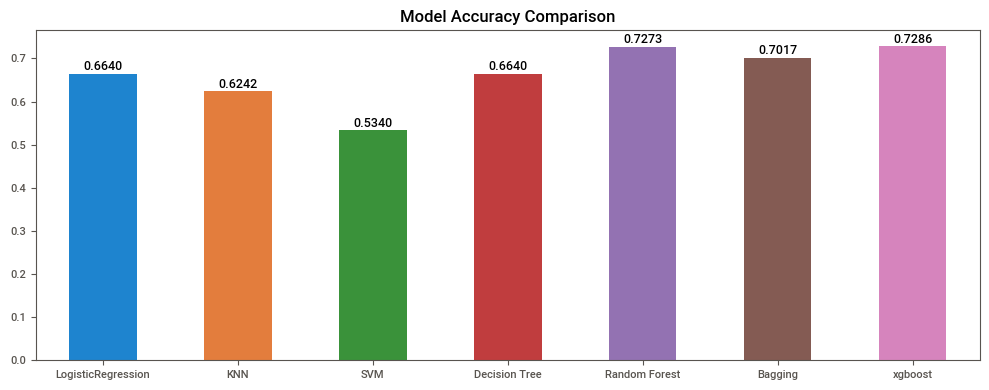

In [115]:
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x=models, y=accuracy_scores,width=0.5)
plt.title('Model Accuracy Comparison')

# Add labels to the top of each bar
for index, value in enumerate(accuracy_scores):
    bar_plot.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Using Random Forest we achieved almost similar accuracy score i.e, above 73%, meaning that we are actually able to predict values quite near to the actual prices for majority of the rows.

So we can use one predictive models, Random forest giving the highest performance, for production to solve our problem in predicting the Lead Catergory.``